## ASSIGNMENT

# Dataset

Assume you are a scientist who is trying to make a propellent and is trying many tests to make an efficient propellent .
<br>
You have performed two tests.
<br>
From the two tests you would like whether this propellent works efficiently or not.
Build your own logistic regression model to decide .
<br>
Text with "DO NOT EDIT THIS CODE" needs to be only run do not edit it


In [1]:
#import libraries
#write your code.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

In [2]:
#load data

#write your code
data = pd.read_csv('/home/gajendra/ML/Learner Space/Week 1/Logistic regression Assignment/data.txt', names = ['x1', 'x2', 'y'])
data

X_train = np.array(data.iloc[:, :2])
y_train = np.array(data.iloc[:, 2])
X_train[y_train == 1, 1]

array([ 0.69956 ,  0.68494 ,  0.69225 ,  0.50219 ,  0.46564 ,  0.2098  ,
        0.034357, -0.19225 , -0.40424 , -0.51389 , -0.56506 , -0.5212  ,
       -0.24342 , -0.18494 ,  0.48757 ,  0.5826  ,  0.53874 ,  0.81652 ,
        0.69956 ,  0.63377 ,  0.59722 ,  0.33406 ,  0.005117, -0.27266 ,
       -0.39693 , -0.60161 , -0.53582 , -0.53582 ,  0.54605 ,  0.77997 ,
        0.96272 ,  0.8019  ,  0.64839 ,  0.47295 ,  0.31213 ,  0.027047,
       -0.21418 , -0.18494 , -0.16301 , -0.41155 , -0.2288  , -0.18494 ,
       -0.14108 ,  0.012427,  0.15863 ,  0.26827 ,  0.44371 ,  0.52412 ,
        0.67032 ,  0.69225 ,  0.57529 ,  0.39985 ,  0.55336 ,  0.35599 ,
        0.17325 ,  0.21711 , -0.016813, -0.27266 ])

In [3]:
#plot data to visualise
def plot_data(X,y,positive_label="y=1", negative_label="y=0"):
#positive_label and negative_label refers to classes of y as y can be 0 or 1
#While plotting graph the label parameter will be either positive_label or negative_label so plot both the labels for X
#write your code
  pos = y == 1
  neg = y == 0
  plt.scatter(X[pos, 0], X[pos, 1], c='b', marker = 'x', label = positive_label)
  plt.scatter(X[neg, 0], X[neg, 1], c = 'r', marker='o', label = negative_label)

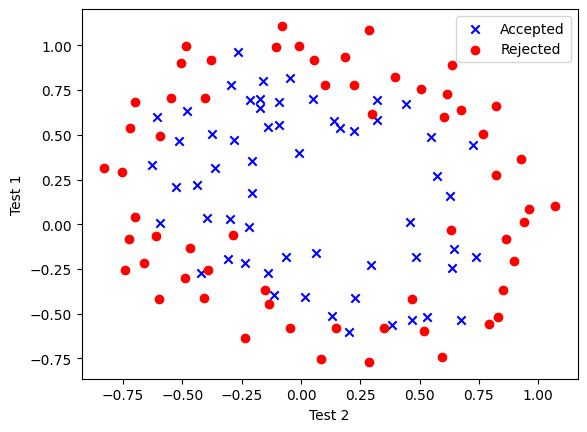

In [4]:
#test
plot_data(X_train, y_train, positive_label="Accepted", negative_label="Rejected")


plt.xlabel('Test 2')
plt.ylabel('Test 1')
plt.legend(loc="upper right")
plt.show()


In [5]:
#feature mapping
def map_feature(X1,X2):
#write your code
     X1=np.atleast_1d(X1)
     X2=np.atleast_1d(X2)
     degree=6
     out=[]
     for i in range(1,degree+1):
       for j in range(i+1):
         out.append((X1**(i-j) * (X2**j)))
     return np.stack(out, axis=1)


In [6]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


# Do not edit this code

In [7]:
# @title DO NOT EDIT THIS CODE
def sigmoid_test(target):
    assert np.isclose(target(3.0), 0.9525741268224334), "Failed for scalar input"
    assert np.allclose(target(np.array([2.5, 0])), [0.92414182, 0.5]), "Failed for 1D array"
    assert np.allclose(target(np.array([[2.5, -2.5], [0, 1]])),
                       [[0.92414182, 0.07585818], [0.5, 0.73105858]]), "Failed for 2D array"
    print('\033[92mTests passed!')

In [8]:
#sigmoid function
def sigmoid(z):
#write your code
    deno = 1 + np.exp(-z)
    return 1 / deno


In [9]:
sigmoid_test(sigmoid)

Tests passed!


In [10]:
# @title DO NOT EDIT THIS CODE
def compute_cost_test(target):
    X = np.array([[0, 0, 0, 0]]).T
    y = np.array([0, 0, 0, 0])
    w = np.array([0])
    b = 1
    result = target(X, y, w, b)
    if math.isinf(result):
        raise ValueError("Did you get the sigmoid of z_wb?")

    np.random.seed(17)
    X = np.random.randn(5, 2)
    y = np.array([1, 0, 0, 1, 1])
    w = np.random.randn(2)
    b = 0
    result = target(X, y, w, b)
    assert np.isclose(result, 2.15510667), f"Wrong output. Expected: {2.15510667} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 1, 0, 0])
    w = np.random.randn(3)
    b = 0

    result = target(X, y, w, b)
    assert np.isclose(result, 0.80709376), f"Wrong output. Expected: {0.80709376} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 0,1, 0])
    w = np.random.randn(3)
    b = 3
    result = target(X, y, w, b)
    assert np.isclose(result, 0.4529660647), f"Wrong output. Expected: {0.4529660647} got: {result}. Did you inizialized z_wb = b?"

    print('\033[92mTests passed!')

In [11]:
#computing cost
def compute_cost(X,y,w,b,lambda_=1):
#write your code
  z = np.dot(X, w) + b
  total_cost = 0
  predictions = sigmoid(z)
  for i in range(X.shape[0]):
    z_i = (X[i] @ w) + b
    y_i = sigmoid(z_i)
    total_cost += (-y[i] * np.log(y_i)) - ((1 - y[i]) * np.log(1 - y_i))
  total_cost = total_cost / len(X)
  return total_cost

In [12]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)
# print('Cost at test w,b: {:.3f}'.format(cost))

# test
compute_cost_test(compute_cost)

Tests passed!


In [13]:
#compute regularised cost
def compute_cost_reg(X, y, w, b, lambda_ = 1):
#write your code
  m = len(X)
  cost = 0

  # for loss
  for i in range(X.shape[0]):
    z_i = (X[i] @ w) + b
    y_pred = sigmoid(z_i)
    
    cost += (y[i] * np.log(y_pred) + (1 - y[i]) * np.log(1 - y_pred))
  

  # for reg
  w_sum = 0
  for num in w:
    w_sum += (num**2)
  
  reg_term = (lambda_ / (2*m)) * w_sum
  cost = cost / (m)
    
  total_cost = reg_term - cost
  return total_cost

In [14]:
# @title DO NOT EDIT THIS CODE
def compute_cost_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(3)
    b = 0.4
    X = np.random.randn(6, 3)
    y = np.array([0, 1, 1, 0, 1, 1])
    lambda_ = 0.1
    expected_output = target(X, y, w, b, lambda_)

    assert np.isclose(expected_output, 0.5469746792761936), f"Wrong output. Expected: {0.5469746792761936} got:{expected_output}"

    w = np.random.randn(5)
    b = -0.6
    X = np.random.randn(8, 5)
    y = np.array([1, 0, 1, 0, 0, 1, 0, 1])
    lambda_ = 0.01
    output = target(X, y, w, b, lambda_)
    assert np.isclose(output, 1.2608591964119995), f"Wrong output. Expected: {1.2608591964119995} got:{output}"

    w = np.array([2, 2, 2, 2, 2])
    b = 0
    X = np.zeros((8, 5))
    y = np.array([0.5] * 8)
    lambda_ = 3
    output = target(X, y, w, b, lambda_)
    expected = -np.log(0.5) + 3. / (2. * 8.) * 20.
    assert np.isclose(output, expected), f"Wrong output. Expected: {expected} got:{output}"

    print('\033[92mAll tests passed!')

In [15]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularised cost :", cost)

#test
compute_cost_reg_test(compute_cost_reg)

Regularised cost : 0.6618252552483948
All tests passed!


In [16]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_test(target):
    np.random.seed(1)
    X = np.random.randn(7, 3)
    y = np.array([1, 0, 1, 0, 1, 1, 0])
    test_w = np.array([1, 0.5, -0.35])
    test_b = 1.7
    dj_db, dj_dw  = target(X, y, test_w, test_b)

    assert np.isclose(dj_db, 0.28936094), f"Wrong value for dj_db. Expected: {0.28936094} got: {dj_db}"
    assert dj_dw.shape == test_w.shape, f"Wrong shape for dj_dw. Expected: {test_w.shape} got: {dj_dw.shape}"
    assert np.allclose(dj_dw, [-0.11999166, 0.41498775, -0.71968405]), f"Wrong values for dj_dw. Got: {dj_dw}"

    print('\033[92mTests passed!')

In [17]:
#compute gradient
def compute_gradient(X, y, w, b, lambda_=None):
#write your code
  dj_dw = []
  dj_db = 0

  Z = np.dot(X, w) + b
  y_i = sigmoid(Z)
  error = y_i - y
  dj_dw = np.dot(X.T, error) / X.shape[0]

  dj_db = np.sum(error) / X.shape[0]

  # for j, w_j in enumerate(w):
  #   dj_dw_j = 0
  #   for i in range(X.shape[0]):
  #     z_i = (X[i] @ w) + b
  #     y_i = sigmoid(z_i)

  #     error = (y_i - y[i]) * X[i][j]
  #     dj_dw_j = dj_dw_j + error

  #   dj_dw_j = dj_dw_j / X.shape[0]
  #   # dj_dw_j = dj_dw_j + (lambda_ / X.shape[0]) * w_j
  #   dj_dw.append(dj_dw_j)

  # for i in range(X.shape[0]):
  #    z_i = (X[i] @ w) + b
  #    y_i = sigmoid(z_i)
  #    error = (y_i - y[i])
  #    dj_db += error

  # dj_db = dj_db / X.shape[0]

  # dj_dw = np.array(dj_dw)

  return dj_db,dj_dw

In [18]:
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw)

# test
compute_gradient_test(compute_gradient)

dj_db at test_w: -0.4915254236924827
dj_dw at test_w: [-0.00860136 -0.09147301]
Tests passed!


In [19]:
#compute regularised gradient
def compute_gradient_reg(X, y, w, b, lambda_=1):
#write your code
  # B = np.full(shape = (X.shape[0]), fill_value = b)
  Z = np.dot(X, w) + b
  
  y_i = sigmoid(Z)
  error = y_i - y

  dj_dw = (np.dot(X.T, error) + (lambda_ * w)) / X.shape[0]

  dj_db = np.sum(error) / X.shape[0]
  

  return dj_db,dj_dw


In [20]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(5)
    b = 0.2
    X = np.random.randn(7, 5)
    y = np.array([0, 1, 1, 0, 1, 1, 0])
    lambda_ = 0.1
    expected1 = (-0.1506447567869257, np.array([ 0.19530838, -0.00632206,  0.19687367,  0.15741161,  0.02791437]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)

    assert np.isclose(dj_db, expected1[0]), f"Wrong dj_db. Expected: {expected1[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected1[1]), f"Wrong dj_dw. Expected: {expected1[1]} got: {dj_dw}"


    w = np.random.randn(7)
    b = 0
    X = np.random.randn(7, 7)
    y = np.array([1, 0, 0, 0, 1, 1, 0])
    lambda_ = 0
    expected2 = (0.02660329857573818, np.array([ 0.23567643, -0.06921029, -0.19705212, -0.0002884 ,  0.06490588,
        0.26948175,  0.10777992]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)
    assert np.isclose(dj_db, expected2[0]), f"Wrong dj_db. Expected: {expected2[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected2[1]), f"Wrong dj_dw. Expected: {expected2[1]} got: {dj_dw}"

    print('\033[92mTests passed!')

In [21]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}" )
#test
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.07138288792343656
Tests passed!


In [60]:
np.random.seed(1)
initial_w = (np.random.rand(X_mapped.shape[1])-0.5)
initial_b = 1
lambda_ = 0.01
iterations = 12000
alpha = 0.01

def gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_):
  w = initial_w
  b = initial_b

  lr = alpha
  epochs = iterations

  X = X_mapped
  y = y_train

  J_history = []

  for i in range(epochs):
    J_history.append(compute_cost_reg(X, y, w, b, lambda_))
    dj_db, dj_dw = compute_gradient_reg(X, y, w, b, lambda_)
    w = w - (lr * dj_dw)
    b = b - (lr * dj_db)
    
  return w, b, J_history, _

w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)


In [61]:
#plot decision boundary
from mpl_toolkits.mplot3d import Axes3D
def plot_decision_boundary(w,b,X,y):
#write your code

    # 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Ploting data points
    ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap=plt.cm.Paired, edgecolors='k')

    # Create a grid of values
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    zz = (w[0] * xx + w[1] * yy + b)

    # Ploting the decision boundary
    ax.plot_surface(xx, yy, zz, alpha=0.9, rstride=100, cstride=100)

    # Set labels
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Decision Boundary')

    ax.view_init(elev=10, azim=50)  # Adjust azim to change the side view

    plt.title('3D Decision Boundary (Side View)')
    plt.show()

    # plt.title('3D Decision Boundary')
    # plt.show()


In [62]:
#plot decision boundary
def plot_decision_boundary(w,b,X,y):

    plot_data(X[:, 0:2], y)

    if X.shape[1] <= 2:
        plot_x = np.array([min(X[:, 0]), max(X[:, 0])])
        plot_y = (-1. / w[1]) * (w[0] * plot_x + b)

        plt.plot(plot_x, plot_y, c="b")

    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((len(u), len(v)))


        for i in range(len(u)):
            for j in range(len(v)):
                z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)


        z = z.T


        plt.contour(u,v,z, levels = [0.5], colors="g")

/tmp/ipykernel_55184/1319808980.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i,j] = sigmoid(np.dot(map_feature(u[i], v[j]), w) + b)


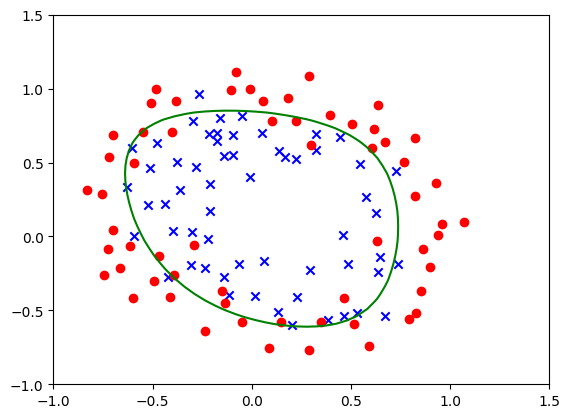

In [63]:
plot_decision_boundary(w, b, X_mapped, y_train)

In [64]:
#predict your training model
def predict(X, w, b):
  m,n=X.shape
  p=np.zeros(m)
  print(X[0].shape, w.shape)
  #write your code
  for i in range(m):
    p[i] = sigmoid((X[i]@ w) + b)
    if(p[i] < 0.5):
      p[i] = 0

    else: p[i] = 1

  return p

In [65]:
p = predict(X_mapped, w, b)

print('Accuracy of training model: %f'%(np.mean(p == y_train) * 100))

(27,) (27,)
Accuracy of training model: 82.203390
